5 sınıf
224 x 224

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
import cv2
import os
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import pandas as pd
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
import cv2
import matplotlib.pyplot as plt

!unzip "/content/drive/MyDrive/BITIRME.zip"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: BITIRME/train/42683_right.jpeg  
  inflating: BITIRME/train/42687_left.jpeg  
  inflating: BITIRME/train/42687_right.jpeg  
  inflating: BITIRME/train/42689_left.jpeg  
  inflating: BITIRME/train/42689_right.jpeg  
  inflating: BITIRME/train/4269_left.jpeg  
  inflating: BITIRME/train/4269_right.jpeg  
  inflating: BITIRME/train/42690_left.jpeg  
  inflating: BITIRME/train/42690_right.jpeg  
  inflating: BITIRME/train/42695_left.jpeg  
  inflating: BITIRME/train/42695_right.jpeg  
  inflating: BITIRME/train/427_left.jpeg  
  inflating: BITIRME/train/427_right.jpeg  
  inflating: BITIRME/train/4270_left.jpeg  
  inflating: BITIRME/train/4270_right.jpeg  
  inflating: BITIRME/train/42700_left.jpeg  
  inflating: BITIRME/train/42700_right.jpeg  
  inflating: BITIRME/train/42701_left.jpeg  
  inflating: BITIRME/train/42701_right.jpeg  
  inflating: BITIRME/train/42702_left.jpeg  
  inflating: BITIRME/train/42702_right.jpeg  
  inf

In [ ]:
import pandas as pd
# Etiketleri içeren CSV dosyası
labels_df = pd.read_csv("/content/BITIRME/trainLabels.csv", sep=';')
labels_df

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [ ]:
labels_df.columns

Index(['image', 'level'], dtype='object')

In [ ]:
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

ESKİİİİ


In [ ]:
# # Etiketlerin ve dosya adlarının olduğu sözlük
# labels_dict = dict(zip(labels_df["image"], labels_df["level"]))

# data_labels = {}

# images_folder_path = glob("/content/drive/MyDrive/1000_gorsel/*.jpeg")

# for image_path in images_folder_path:
#     # Dosya adını al
#     name_with_extension = image_path.split("/")[-1]

#     # Dosya adından ".jpeg" uzantısını kaldır
#     name_without_extension = name_with_extension.split(".")[0]

#     if name_without_extension in labels_dict:
#       label = labels_dict[name_without_extension]
#       data_labels[image_path] = label

In [ ]:
from PIL import Image
# Etiketlerin ve dosya adlarının olduğu sözlük
labels_dict = dict(zip(labels_df["image"], labels_df["level"]))

data_labels = {}

images_folder_path = glob("/content/drive/MyDrive/1000_gorsel/*.jpeg")

for image_path in images_folder_path:
    # Dosya adını al
    name_with_extension = image_path.split("/")[-1]

    # Dosya adından ".jpeg" uzantısını kaldır
    name_without_extension = name_with_extension.split(".")[0]

    if name_without_extension in labels_dict:
        label = labels_dict[name_without_extension]
        data_labels[image_path] = label

        # Görseli oku ve yeniden boyutlandır
        image = Image.open(image_path)
        resized_image = image.resize((224, 224))
        # Yeniden boyutlandırılmış görseli aynı yola kaydet
        resized_image.save(image_path)


In [ ]:
df = pd.DataFrame(list(data_labels.items()), columns = ["Image", "Label"])
df

,Image,Label
0,/content/drive/MyDrive/1000_gorsel/43271_left....,0
1,/content/drive/MyDrive/1000_gorsel/42819_right...,0
2,/content/drive/MyDrive/1000_gorsel/41525_left....,1
3,/content/drive/MyDrive/1000_gorsel/4069_right....,0
4,/content/drive/MyDrive/1000_gorsel/41090_right...,0
...,...,...
995,/content/drive/MyDrive/1000_gorsel/41623_left....,0
996,/content/drive/MyDrive/1000_gorsel/4464_left.jpeg,2
997,/content/drive/MyDrive/1000_gorsel/40470_right...,0
998,/content/drive/MyDrive/1000_gorsel/43773_left....,0


In [ ]:
# Sınıflarda bulunan etiket sayılarını hesapla
class_counts = df["Label"].value_counts()

# Her sınıfın etiket sayısını bastır
for class_label, count in class_counts.items():
    print(f"Sınıf {class_label}: {count} adet")

Sınıf 0: 743 adet
Sınıf 2: 156 adet
Sınıf 1: 73 adet
Sınıf 3: 18 adet
Sınıf 4: 10 adet


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


# Veri artırımı için ImageDataGenerator oluştur
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Her sınıf için eksik olan görsel sayısını belirle ve veri artırımı uygula
new_images = []
new_labels = []

def augment_and_add_images(class_label, required_count):
    class_images = df[df["Label"] == class_label]["Image"].values
    current_count = len(class_images)
    num_to_augment = required_count - current_count

    while num_to_augment > 0:
        for image_path in class_images:
            if num_to_augment <= 0:
                break
            image = load_img(image_path, target_size=(224, 224))
            x = img_to_array(image)
            x = x.reshape((1,) + x.shape)  # (1, 224, 224, 3)
            i = 0
            for batch in datagen.flow(x, batch_size=1):
                new_image = array_to_img(batch[0], scale=True)
                new_image_path = f"{image_path.split('.jpeg')[0]}_aug_{i}.jpeg"
                new_image.save(new_image_path)
                new_images.append(new_image_path)
                new_labels.append(class_label)
                i += 1
                num_to_augment -= 1
                if num_to_augment <= 0:
                    break

augment_and_add_images(0, 2500)
augment_and_add_images(1, 2500)
augment_and_add_images(2, 2500)
augment_and_add_images(3, 2500)
augment_and_add_images(4, 2500)

# Yeni oluşturulan görsellerin ve etiketlerin DataFrame'ini oluştur
new_df = pd.DataFrame({"Image": new_images, "Label": new_labels})

# Orijinal ve yeni görsellerin DataFrame'lerini birleştir
final_df = pd.concat([df, new_df], ignore_index=True)

# Final DataFrame'i göster
final_df.head()

# Final DataFrame'i kaydet
final_df.to_csv("/content/BITIRME/augmented_trainLabels.csv", index=False, sep=';')

In [ ]:
# Sınıflarda bulunan etiket sayılarını hesapla
class_counts = final_df["Label"].value_counts()

# Her sınıfın etiket sayısını bastır
for class_label, count in class_counts.items():
    print(f"Sınıf {class_label}: {count} adet")

Sınıf 0: 2500 adet
Sınıf 1: 2500 adet
Sınıf 4: 2500 adet
Sınıf 2: 2500 adet
Sınıf 3: 2500 adet


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
def preprocess_image(image_path):
    # Görüntüyü oku
    image = cv2.imread(image_path)

    # Görüntüyü bir Numpy dizisine dönüştür
    image_array = img_to_array(image)

    # Görüntü piksellerini [0, 1] aralığına normalize et
    image_array /= 255.0

    # Görüntüyü tensöre dönüştür
    image_tensor = tf.convert_to_tensor(image_array)

    return image_tensor

In [ ]:
import tensorflow as tf

In [ ]:
# Görüntü dosyalarının yolu ve etiketleri içeren veri çerçevesini kullanarak görüntü tensörlerini oluştur
image_paths = final_df["Image"].tolist()
labels = final_df["Label"].tolist()

count = 0

image_tensors = []
for image_path in image_paths:
    image_tensor = preprocess_image(image_path)
    count+=1
    if count % 100 == 0:
        print(count)
    image_tensors.append(image_tensor)


# Görüntü tensörlerini birleştirerek giriş tensörünü oluştur
# input_tensor = tf.stack(image_tensors)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500


In [ ]:
len(image_tensors)

12500

In [ ]:
# Tensor listesini DataFrame'e dönüştürme
data = {"ImageTensor": image_tensors, "Label": labels}
df_tensor = pd.DataFrame(data)

# Model girişi için DataFrame'deki tensor sütununu kullanma
input_tensor = df_tensor["ImageTensor"]

# Model girişi olarak kullanılmak üzere DataFrame'deki label sütununu kullanma
labels = df_tensor["Label"]

In [ ]:
input_tensor.shape
labels.shape

(12500,)

In [ ]:
from tensorflow import keras

In [ ]:
from keras import applications
from keras import layers, models
from tensorflow.python.keras.layers import Dense

In [ ]:
import tensorflow_hub as hub

efficientnetv2s_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2"
hub_model = hub.load(efficientnetv2s_url)

In [ ]:
type(labels)
type(input_tensor)

labels.shape
input_tensor.shape

(12500,)

In [ ]:
print(input_tensor.shape)
print(labels.shape)

(12500,)
(12500,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Giriş tensorünü numpy dizisine dönüştürme ve yeniden şekillendirme
reshaped_input_tensors = np.array(input_tensor.tolist()).reshape(-1, 224*224*3)

# labels'ı DataFrame'e dönüştürme
y = pd.DataFrame({'label': labels})

# input_tensor'u DataFrame'e dönüştürme
X = pd.DataFrame(reshaped_input_tensors)

In [ ]:
# Eğitim verisi için ayırma
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=42)

# Kalan veriyi doğrulama ve test verisi olarak ayırma
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Eğitim veri setinin boyutunu kontrol etme
print("Eğitim veri seti boyutu:", X_train.shape, y_train.shape)

# Doğrulama veri setinin boyutunu kontrol etme
print("Doğrulama veri seti boyutu:", X_val.shape, y_val.shape)

# Test veri setinin boyutunu kontrol etme
print("Test veri seti boyutu:", X_test.shape, y_test.shape)

Eğitim veri seti boyutu: (10000, 150528) (10000, 1)
Doğrulama veri seti boyutu: (1250, 150528) (1250, 1)
Test veri seti boyutu: (1250, 150528) (1250, 1)


In [ ]:
# X_train, X_val ve X_test DataFrame'lerini NumPy dizilerine dönüştürme
X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

# Dizileri yeniden şekillendirme
X_train = X_train.reshape(-1, 224, 224, 3)
X_val = X_val.reshape(-1, 224, 224, 3)
X_test = X_test.reshape(-1, 224, 224, 3)

DENEME

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# EfficientNetV2S modelini yeniden oluşturma
base_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Modelin üstüne sınıflandırma katmanları ekleyerek yeni bir model oluşturma
model2 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

# Modeli derleme
model2.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Erken durdurma callback'i
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]
model2.summary()

# Modeli eğitim verisiyle uyumlaştırma
history2 = model2.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,  # Batch boyutunu artırdık
                    validation_data=(X_val, y_val),
                    callbacks=[callbacks],
                    verbose=2)

82420632/82420632 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, 7, 7, 1280)        20331360  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                         

In [ ]:
# Modelin performansını değerlendirme
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

40/40 - 18s - loss: 0.1126 - accuracy: 0.9704 - 18s/epoch - 458ms/step

Test accuracy: 0.9703999757766724


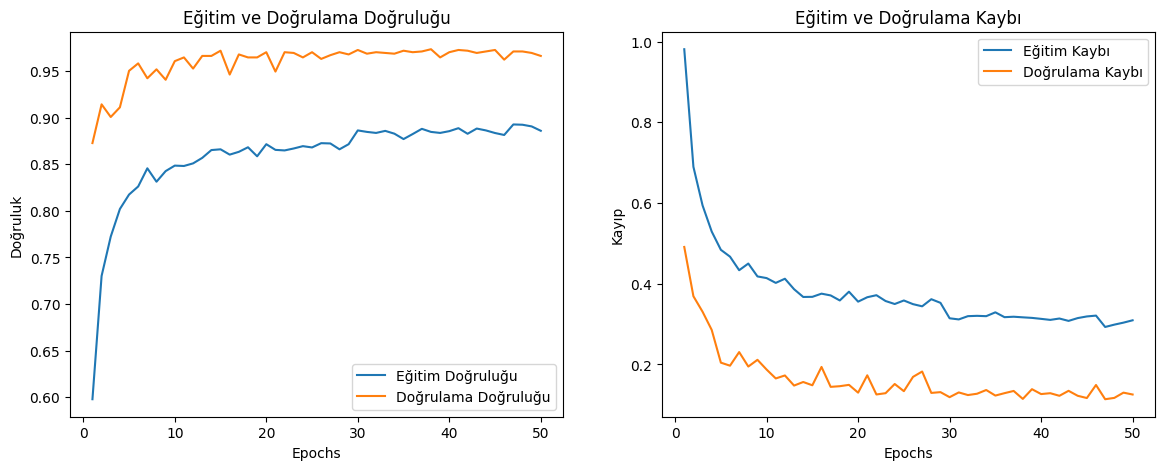

In [ ]:
# Eğitim ve doğrulama doğruluğunu ve kaybını history değişkeninden al
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

# Eğitim ve doğrulama doğruluğunu çizdir
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Eğitim Doğruluğu')
plt.plot(epochs, val_acc, label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()

# Eğitim ve doğrulama kaybını çizdir
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Eğitim Kaybı')
plt.plot(epochs, val_loss, label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()

plt.show()

40/40 [==============================] - 22s 476ms/step


<Figure size 1000x800 with 0 Axes>

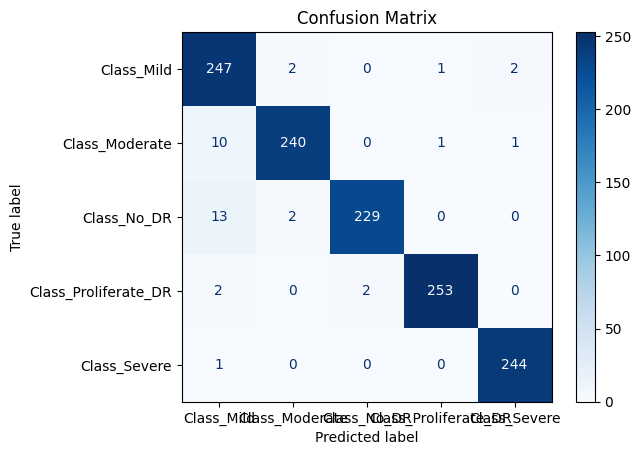

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Sınıf isimlerini tanımlama
class_names = ['Class_Mild', 'Class_Moderate', 'Class_No_DR', 'Class_Proliferate_DR', 'Class_Severe']

# Test verileri ve modelin daha önce tanımlandığını varsayıyoruz
y_pred = np.argmax(model2.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix'i çizdirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model2.save("/content/drive/My Drive/son_v31.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Modeli kaydetme
model2.save("son_v32.h5")

# Modeli yeniden yükleme
loaded_model = models.load_model("son_v32.h5")

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Test verileri üzerinde tahminlerin alınması
y_pred = np.argmax(model2.predict(X_test), axis=-1)

# F1 skorunun hesaplanması
f1 = f1_score(y_test, y_pred, average='weighted')

print('Test F1 score:', f1)

40/40 [==============================] - 19s 473ms/step
Test F1 score: 0.9706037979954312


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined in previous cells
class_names = ['Class_Mild', 'Class_Moderate', 'Class_No_DR', 'Class_Proliferate_DR', 'Class_Severe']
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)


                      precision    recall  f1-score   support

          Class_Mild       0.90      0.98      0.94       252
      Class_Moderate       0.98      0.95      0.97       252
         Class_No_DR       0.99      0.94      0.96       244
Class_Proliferate_DR       0.99      0.98      0.99       257
        Class_Severe       0.99      1.00      0.99       245

            accuracy                           0.97      1250
           macro avg       0.97      0.97      0.97      1250
        weighted avg       0.97      0.97      0.97      1250

